[Quiz] iris 데이터를 불러와서 
1. (12, 12) 사이즈의 캔버스를 만들고
2. (4, 4) 사이즈의 axes를 생성한 후,
3. 각 x, y축을 공유한후,
4. 대각 위치의 도화지에는 각 변수들의 histogram을 그리고
5. 다른 위치의 도화지에는 두 변수 간의 산점도를 그리자.

In [1]:
import matplotlib.pyplot as plt
import numpy as np  

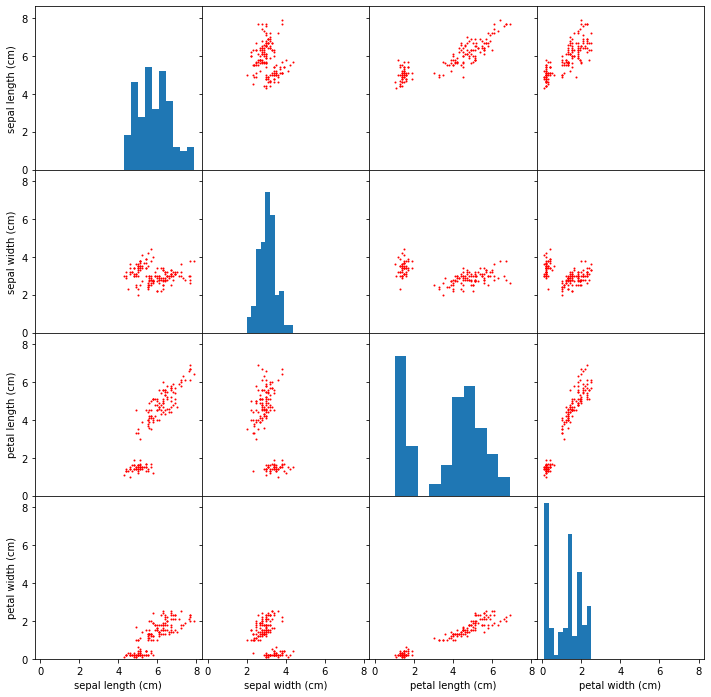

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X, fn = data.data, data.feature_names
fig, axes = plt.subplots(4,4, sharex=True,sharey=True, figsize=(12,12))
ws = np.ones(X.shape[0])*0.2
n, p = axes.shape
for i in range(n):
    for j in range(p):
        ax = axes[i, j]
        if i == j :
            ax.hist(X[:, i], weights=ws)
        else:
            ax.plot(X[:, j], X[:, i], 'ro', markersize=1)
        if j == 0:
            ax.set_ylabel(fn[i])
        if i == 3:
            ax.set_xlabel(fn[j])

plt.subplots_adjust(wspace=0, hspace=0)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
tips = pd.read_csv('./tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


[Quiz] tips.day에 대한 bar plot을 그려보세요.

In [5]:
import seaborn as sns

In [6]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
try:
    tips.day.plot(kind='bar')
except Exception as e:
    print(e)

no numeric data to plot


In [8]:
tips.groupby('day').size()

day
Thur    62
Fri     19
Sat     87
Sun     76
dtype: int64

plot(kind='ba')를 그리려면, 아래와 같은 시리즈 형식을 가져야 그릴 수 있다:
- hist는 구간별 **빈도를 세어서** 막대 그래프를 그리는 함수
- bar는 빈도표의 값을 그대로 막대 그래프로 그리는 함수 

<AxesSubplot:xlabel='day'>

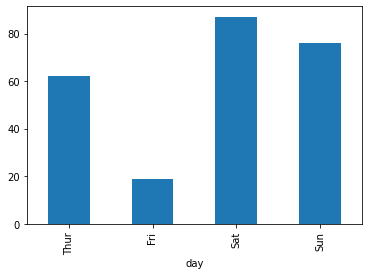

In [9]:
tips.groupby('day').size().plot(kind='bar')

[Quiz] Smoker 별로 색상을 달리하여:
- 지불액 대비 팁의 비율 tipRate를 구하고
- tip과 tipRate에 대한 JointGrid를 그려보자.

C:\Users\ICT01_09\anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
C:\Users\ICT01_09\anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Density', ylabel='tip'>

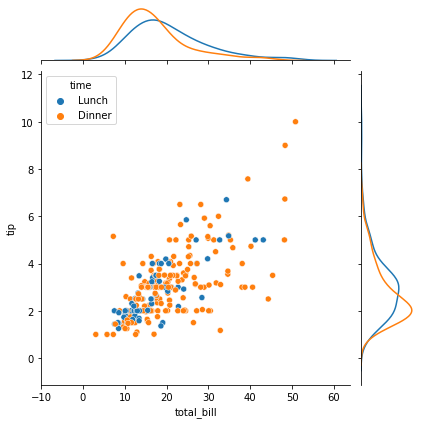

In [11]:
import seaborn as sns
grid = sns.JointGrid(x='total_bill', y='tip', data=tips)

g = grid.plot_joint(sns.scatterplot, hue='time', data=tips)
sns.kdeplot(tips.loc[tips['time']=='Dinner', 'total_bill'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(tips.loc[tips['time']=='Lunch', 'total_bill'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(tips.loc[tips['time']=='Dinner', 'tip'], ax=g.ax_marg_y, vertical=True, legend=False)
sns.kdeplot(tips.loc[tips['time']=='Lunch', 'tip'], ax=g.ax_marg_y, vertical=True, legend=False)

In [12]:
np.unique(tips.smoker)

array(['No', 'Yes'], dtype=object)

C:\Users\ICT01_09\anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
C:\Users\ICT01_09\anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Density', ylabel='tipRate'>

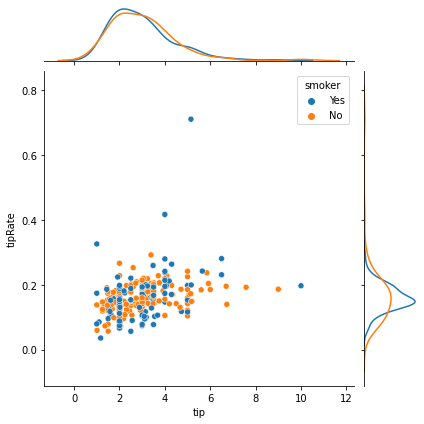

In [13]:
tips['tipRate'] = tips.tip / tips.total_bill
grid = sns.JointGrid(x='tip', y='tipRate', data=tips)

g = grid.plot_joint(sns.scatterplot, hue='smoker', data=tips)
sns.kdeplot(tips.loc[tips['smoker']=='No', 'tip'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(tips.loc[tips['smoker']=='Yes', 'tip'], ax=g.ax_marg_x, legend=False)
sns.kdeplot(tips.loc[tips['smoker']=='No', 'tipRate'], ax=g.ax_marg_y, vertical=True, legend=False)
sns.kdeplot(tips.loc[tips['smoker']=='Yes', 'tipRate'], ax=g.ax_marg_y, vertical=True, legend=False)